In [23]:
import pandas as pd

In [24]:
data = pd.read_csv('train_data.csv')

In [25]:
data_test = pd.read_csv('test_data.csv')

In [3]:
data.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [26]:
data.isnull().sum()

year                    0
month                   0
day                     0
order                   0
country                 0
session_id              0
page1_main_category     0
page2_clothing_model    0
colour                  0
location                0
model_photography       0
price                   0
price_2                 0
page                    0
dtype: int64

In [27]:
data.describe()

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,price,price_2,page
count,132379.0,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000
mean,2008.0,5.582759,14.507671,9.811314,26.949629,12038.722063,2.400426,6.227393,3.261106,1.260026,43.788191,1.488484,1.712137
std,0.0,1.328064,8.829106,13.458937,7.153071,7012.460866,1.145004,4.238354,1.714058,0.438650,12.539390,0.499869,0.983699
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5905.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11931.000000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18212.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [29]:
data.shape

(132379, 14)

In [34]:
data['country'].value_counts() 

country
29    107173
9      14465
24      3272
46      1988
44      1130
16       632
21       622
34       584
41       539
3        193
27       190
12       166
42       141
37       133
31       121
10       120
22       116
28       116
38       114
15        96
11        90
25        54
2         49
32        40
14        35
23        34
19        24
39        24
43        23
17        17
18        15
36        12
7          9
20         8
45         6
47         5
5          4
30         4
6          3
33         3
1          3
35         2
8          1
26         1
13         1
4          1
Name: count, dtype: int64

In [33]:
data['country'].unique()

array([29,  9, 46,  3, 24, 16, 44, 28, 21, 41, 37, 15, 42, 10, 43, 11, 31,
       27, 22, 25, 38, 18, 34, 14, 17, 32, 12, 47, 19, 39,  7,  2, 45, 23,
       20,  5, 30, 36,  6, 35, 33,  8, 26, 13,  1,  4], dtype=int64)

In [35]:
country_mapping = {
    1:'Australia',
    2:'Austria',
    3:'Belgium',
    4:'British Virgin Islands',
    5:'Cayman Islands',
    6:'Christmas Island',
    7:'Croatia',
    8:'Cyprus',
    9:'Czech Republic',
    10:'Denmark',
    11:'Estonia',
    12:'unidentified',
    13:'Faroe Islands',
    14:'Finland',
    15:'France',
    16:'Germany',
    17:'Greece',
    18:'Hungary',
    19:'Iceland',
    20:'India',
    21:'Ireland',
    22:'Italy',
    23:'Latvia',
    24:'Lithuania',
    25:'Luxembourg',
    26:'Mexico',
    27:'Netherlands',
    28:'Norway',
    29:'Poland',
    30:'Portugal',
    31:'Romania',
    32:'Russia',
    33:'San Marino',
    34:'Slovakia',
    35:'Slovenia',
    36:'Spain',
    37:'Sweden',
    38:'Switzerland',
    39:'Ukraine',
    40:'United Arab Emirates',
    41:'United Kingdom',
    42:'USA',
    43:'biz (.biz)',
    44:'com (.com)',
    45:'int (.int)',
    46:'net (.net)',
    47:'org (*.org)'
}

data['country'] = data['country'].map(country_mapping)

In [36]:
data['country'].unique()

array(['Poland', 'Czech Republic', 'net (.net)', 'Belgium', 'Lithuania',
       'Germany', 'com (.com)', 'Norway', 'Ireland', 'United Kingdom',
       'Sweden', 'France', 'USA', 'Denmark', 'biz (.biz)', 'Estonia',
       'Romania', 'Netherlands', 'Italy', 'Luxembourg', 'Switzerland',
       'Hungary', 'Slovakia', 'Finland', 'Greece', 'Russia',
       'unidentified', 'org (*.org)', 'Iceland', 'Ukraine', 'Croatia',
       'Austria', 'int (.int)', 'Latvia', 'India', 'Cayman Islands',
       'Portugal', 'Spain', 'Christmas Island', 'Slovenia', 'San Marino',
       'Cyprus', 'Mexico', 'Faroe Islands', 'Australia',
       'British Virgin Islands'], dtype=object)

In [7]:
data['page1_main_category'].value_counts()

page1_main_category
1    39891
4    30994
3    30911
2    30583
Name: count, dtype: int64

In [37]:
page1_mapping = {
    1:'Trousers',
    2:'Skirts',
    3:'Blouses',
    4:'Shirts'
}

data['page1_main_category'] = data['page1_main_category'].map(page1_mapping)

In [39]:
data['colour'].value_counts()

colour
2     23840
3     23380
6     13966
4     13186
14    12795
9     10865
12     7082
1      6266
7      5474
13     5048
11     4161
10     2824
8      2146
5      1346
Name: count, dtype: int64

In [40]:
colour_mapping = {
    1:'Beige',
    2:'Black',
    3:'Blue',
    4:'Brown',
    5:'Burgundy',
    6:'Gray',
    7:'Green',
    8:'Navy Blue',
    9:'Purple',+
    10:'Olive',
    11:'Pink',
    12:'Red',
    13:'Violet',
    14:'White'
}

data['colour'] = data['colour'].map(colour_mapping)

In [41]:
data['location'].value_counts()

location
1    27627
2    26610
5    22291
4    21936
3    17278
6    16637
Name: count, dtype: int64

In [42]:
location_mapping = {
    1:'top left',
    2:'top in the middle',
    3:'top right',
    4:'bottom left',
    5:'bottom in the middle',
    6:'bottom right'
}

data['location'] = data['location'].map(location_mapping)

In [43]:
data['model_photography'].value_counts()

model_photography
1    97957
2    34422
Name: count, dtype: int64

In [44]:
model_mapping = {
    1:'en-face',
    2:'profile'
}

data['model_photography'] = data['model_photography'].map(model_mapping)

In [45]:
data['price_2'].value_counts()

price_2
1    67714
2    64665
Name: count, dtype: int64

In [46]:
price_2_mapping = {
    1:'Purchased',
    2:'Not Purchased'
}

data['price_2'] = data['price_2'].map(price_2_mapping)

## Data Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gowth\AppData\Local\Temp\ipykernel_18436\3767069718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_2', data=data, palette='viridis')


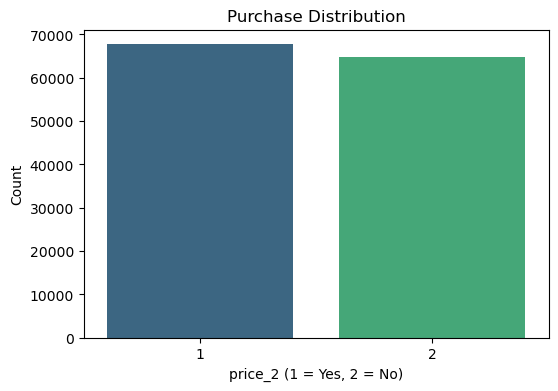

In [22]:
# classification
plt.figure(figsize=(6, 4))
sns.countplot(x='price_2', data=data, palette='viridis')
plt.title("Purchase Distribution")
plt.xlabel("price_2 (1 = Yes, 2 = No)")
plt.ylabel("Count")
plt.show()

C:\Users\gowth\AppData\Local\Temp\ipykernel_25948\1972280366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=data, palette='viridis')


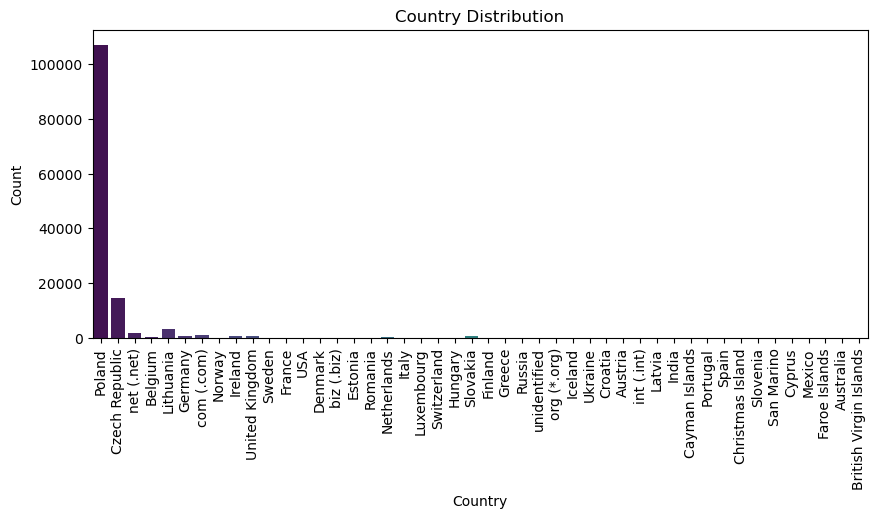

In [48]:
plt.figure(figsize=(10, 4))
sns.countplot(x='country', data=data, palette='viridis')
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

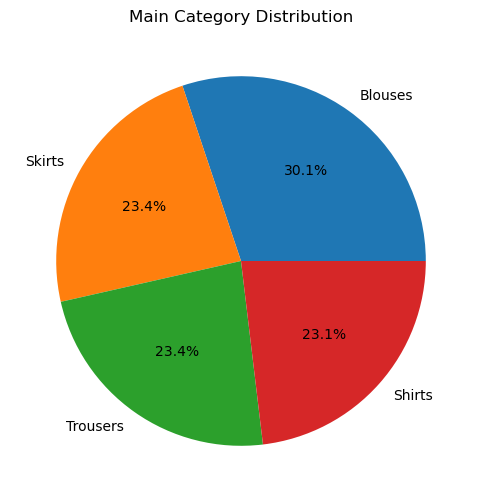

In [49]:
plt.figure(figsize=(8,6))
plt.pie(x=data['page1_main_category'].value_counts(), labels=data['page1_main_category'].unique(), autopct='%1.1f%%')
plt.title('Main Category Distribution')
plt.show()

C:\Users\gowth\AppData\Local\Temp\ipykernel_25948\2358111548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='colour', data=data, palette='viridis')


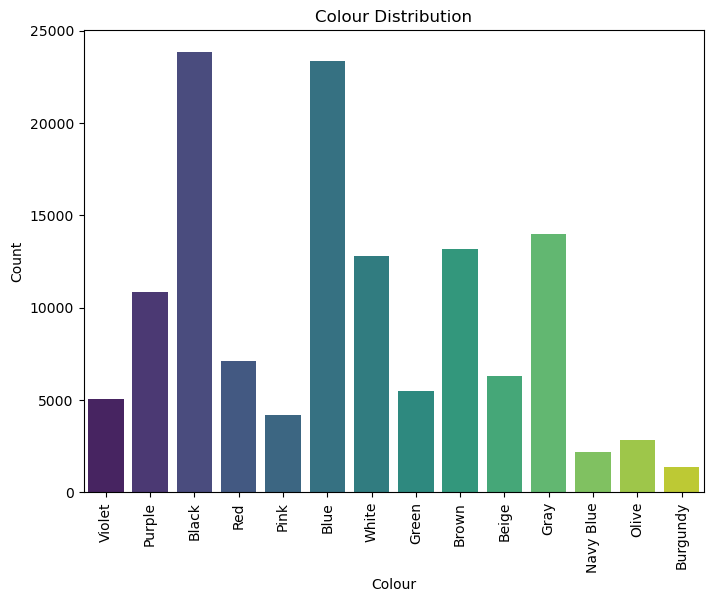

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x='colour', data=data, palette='viridis')
plt.title("Colour Distribution")
plt.xlabel("Colour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

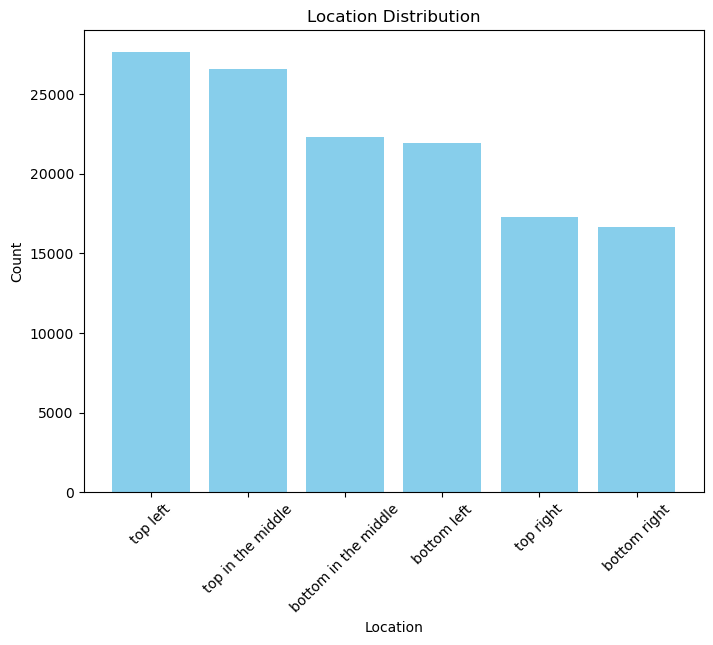

In [53]:
plt.figure(figsize=(8,6))
plt.bar(data['location'].value_counts().index, data['location'].value_counts().values, color = 'skyblue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')
plt.xticks(rotation=45)
plt.show()

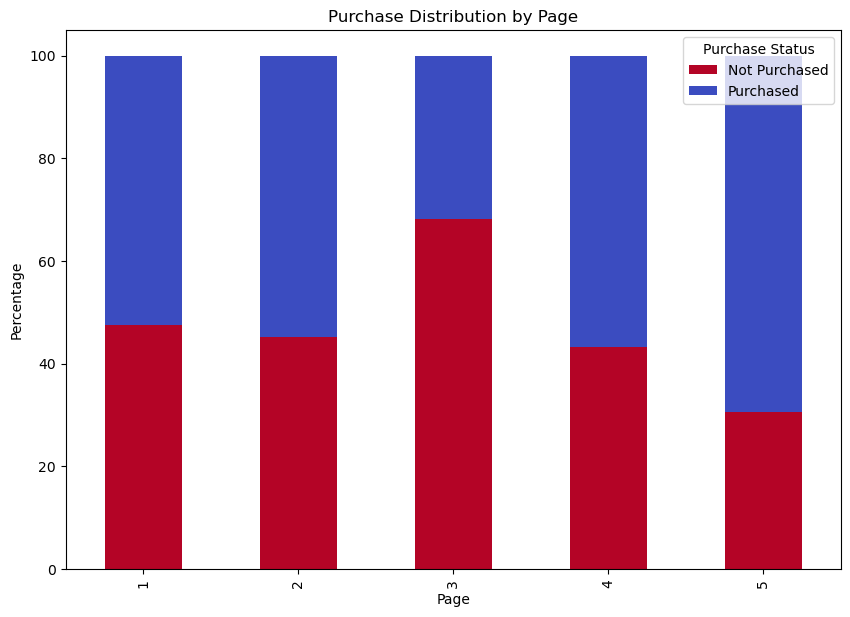

In [54]:
page_price2_cross = pd.crosstab(data['page'], data['price_2'], normalize='index') * 100
page_price2_cross.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='coolwarm_r')
plt.xlabel('Page')
plt.ylabel('Percentage')
plt.title('Purchase Distribution by Page')
plt.legend(title='Purchase Status')
plt.show()

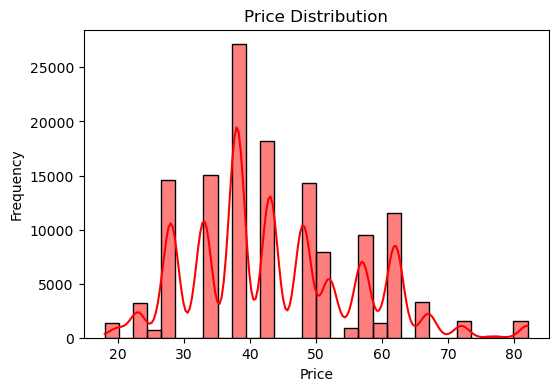

In [24]:
# regression
plt.figure(figsize=(6, 4))
sns.histplot(data['price'], bins=30, kde=True, color='red')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

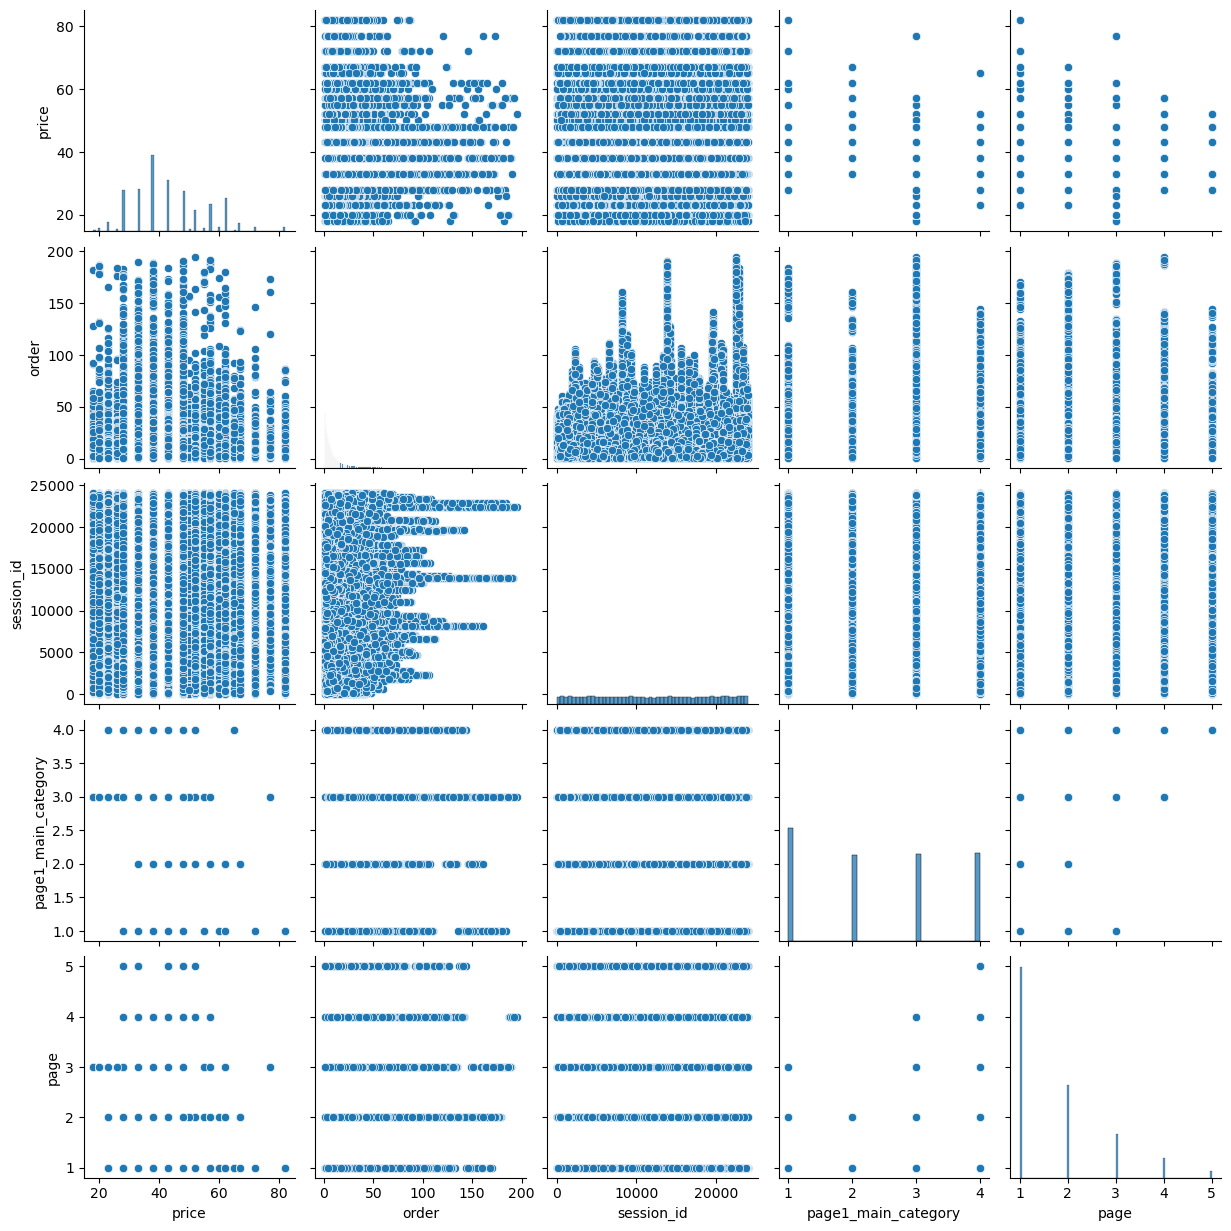

In [26]:
sns.pairplot(data[['price', 'order', 'session_id','page1_main_category', 'page']])
plt.show()

In [8]:
data.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

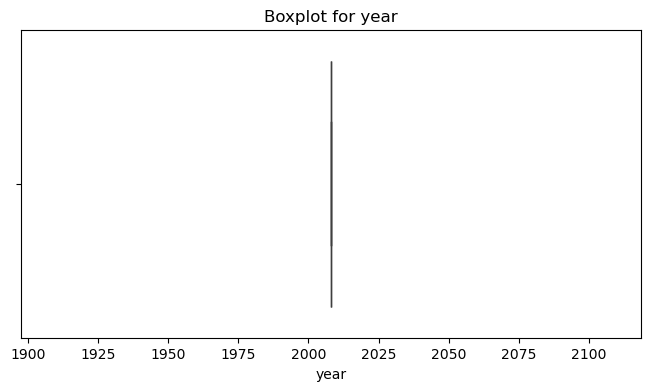

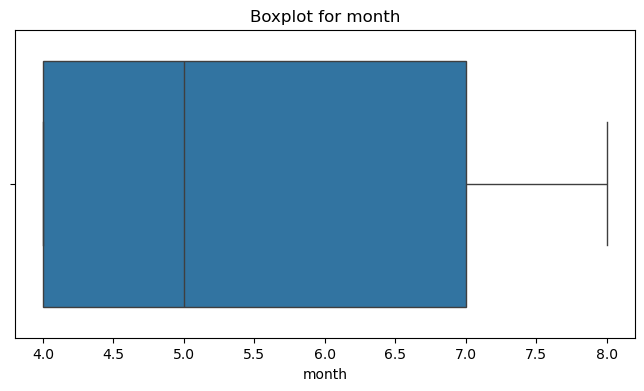

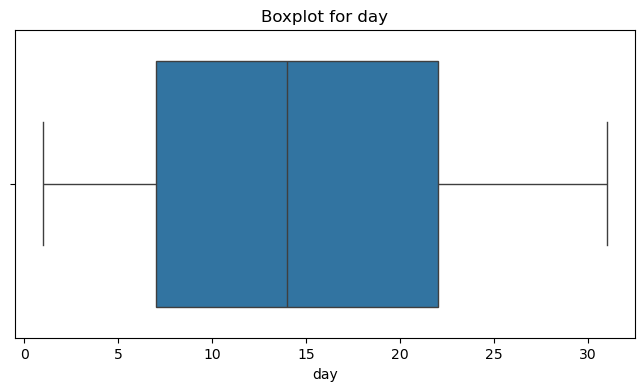

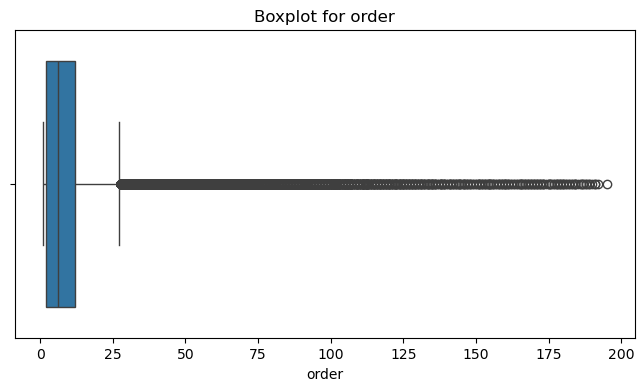

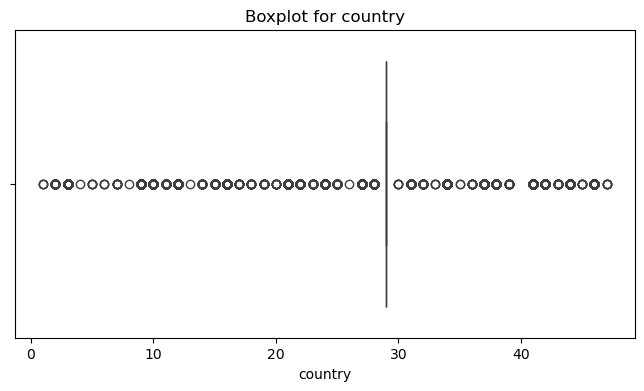

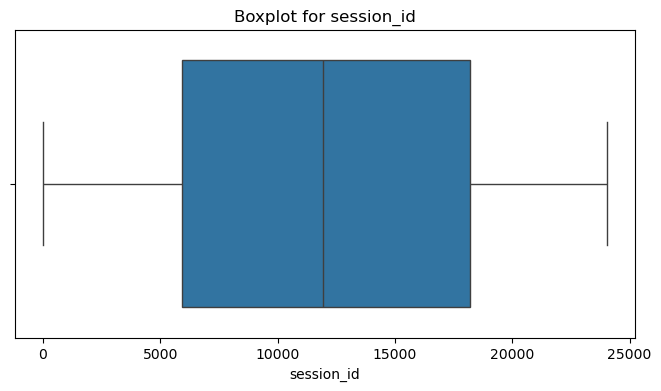

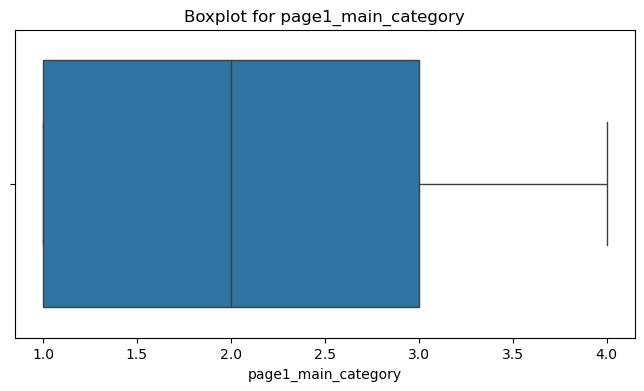

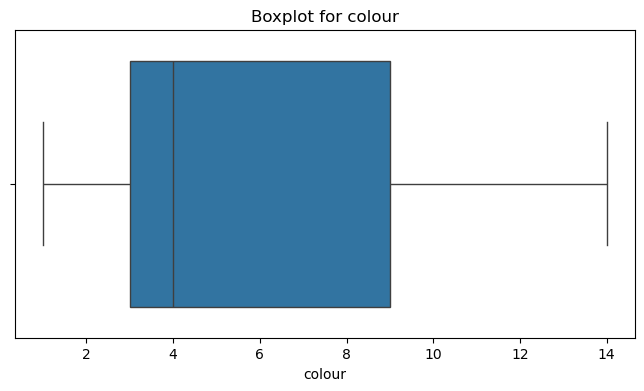

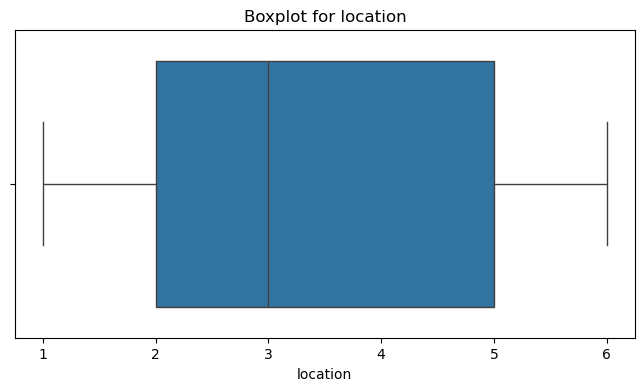

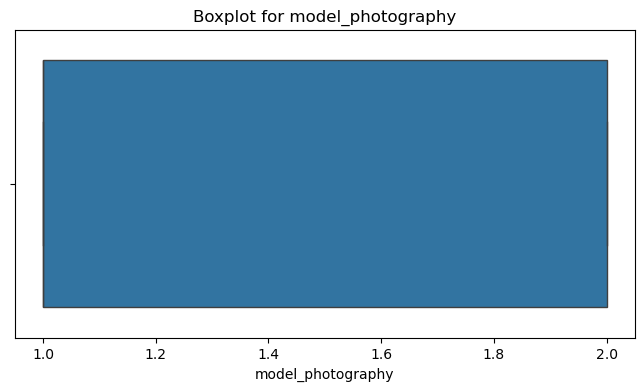

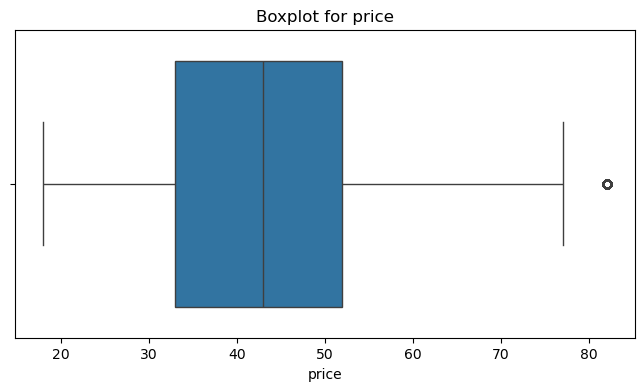

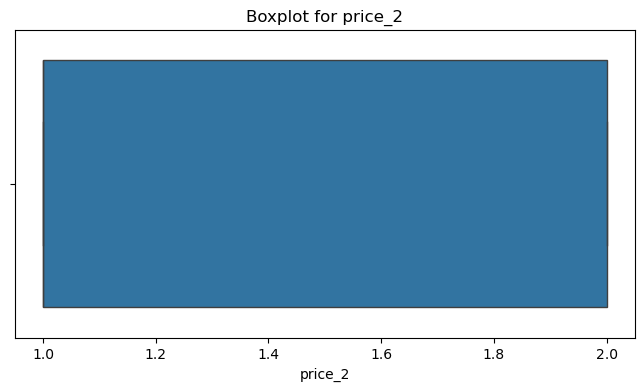

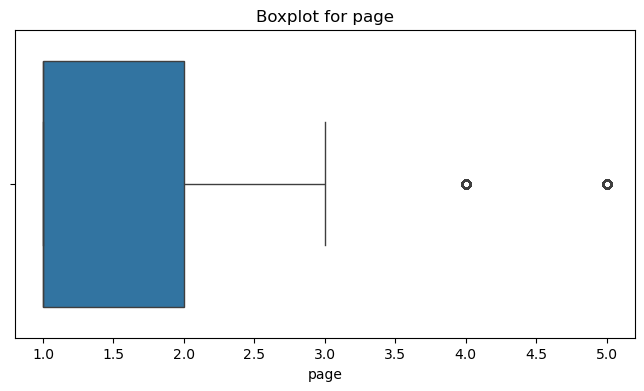

In [10]:
# Numeric features to check for outliers
numeric_features = ['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page']

# Boxplot for a single numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()

In [11]:
df_cap = data.copy()

In [12]:
#Finding the IQR
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_limit = q3 + (factor*iqr)
        lower_limit = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_limit, upper_limit,
                 np.where(df[col]<lower_limit, lower_limit, df[col]))

In [13]:
numeric_features = ['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page']

In [14]:
iqr_capping(df_cap, numeric_features, 1.5)

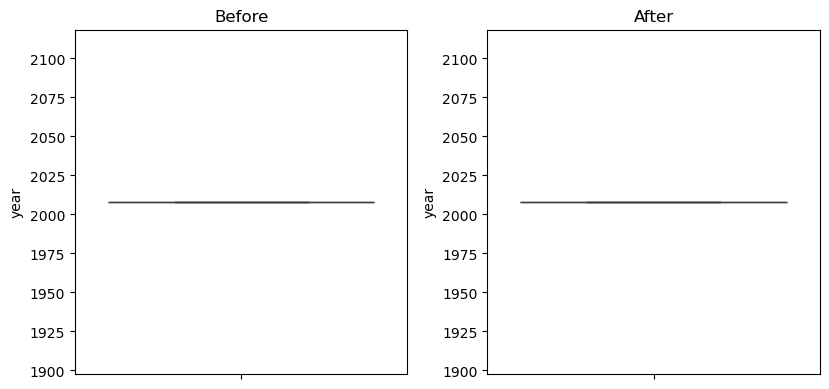

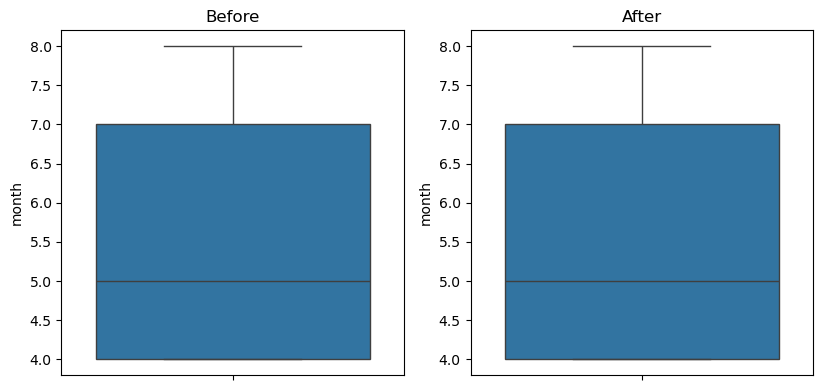

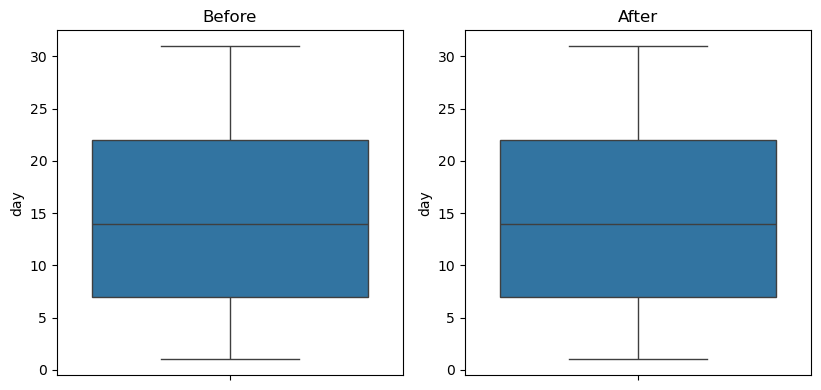

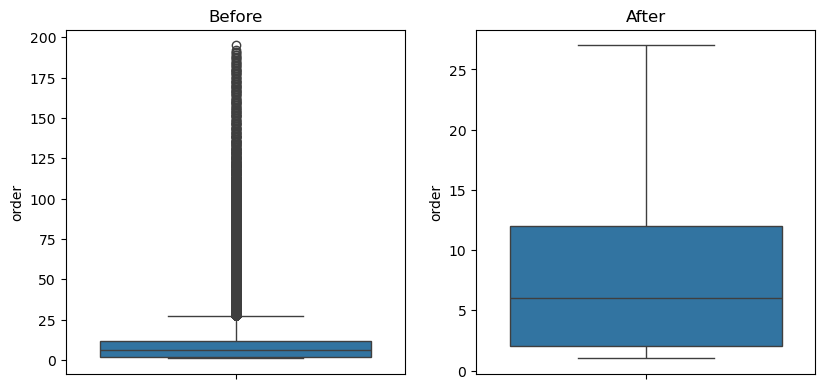

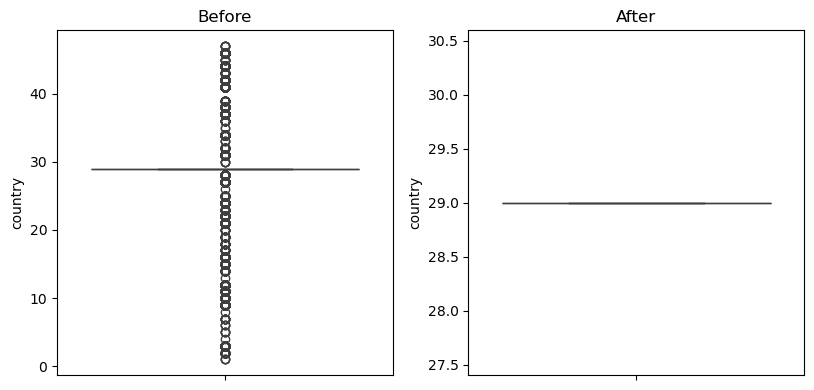

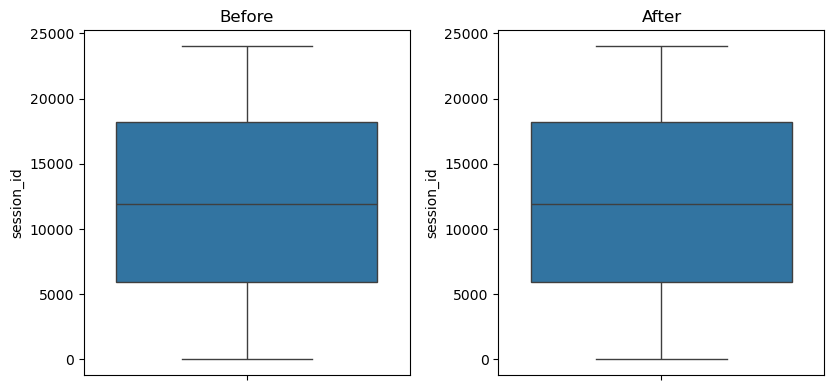

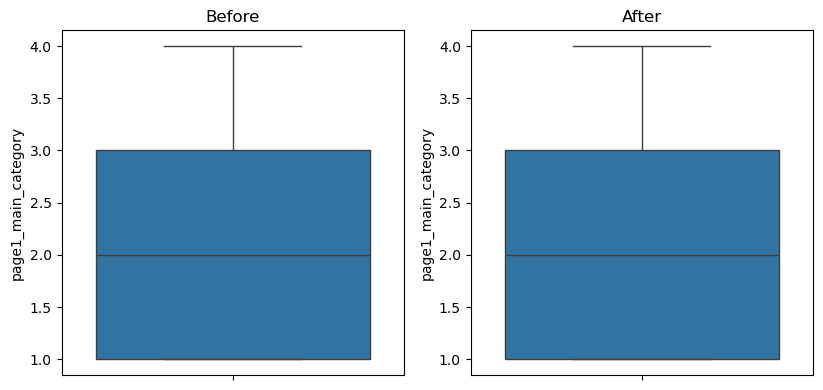

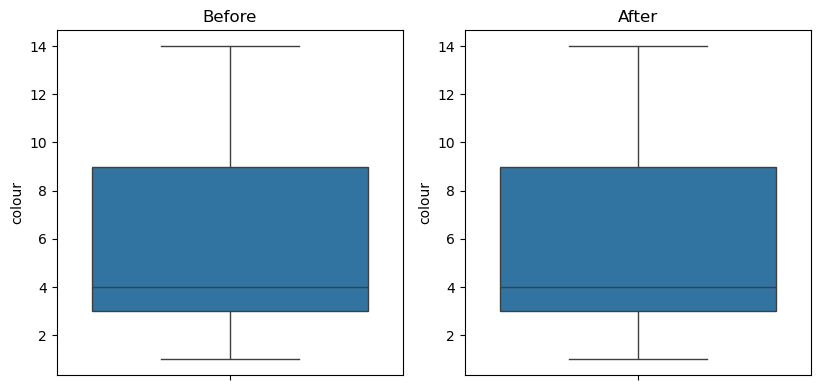

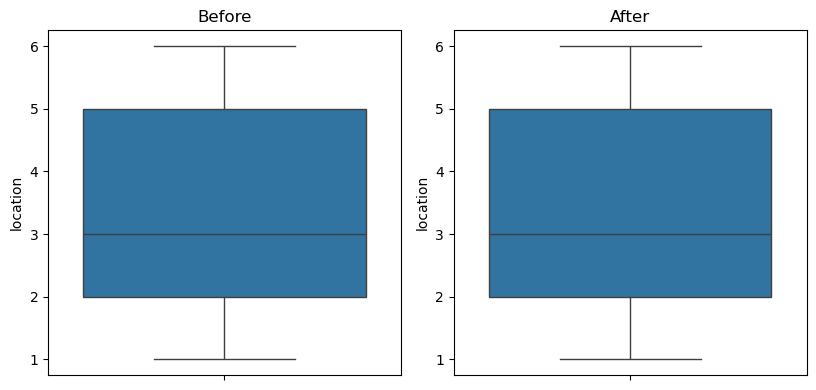

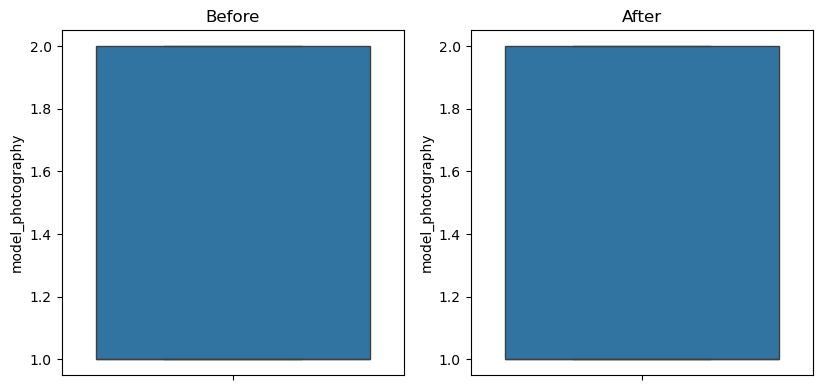

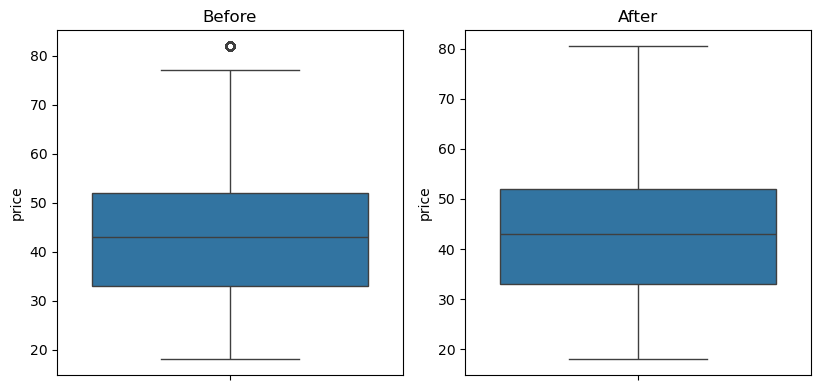

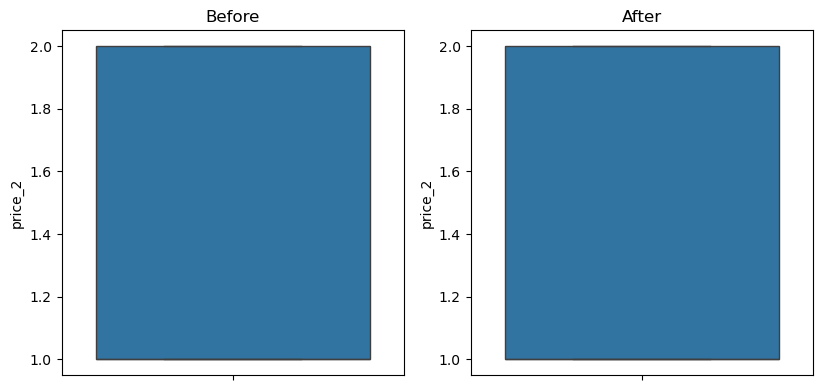

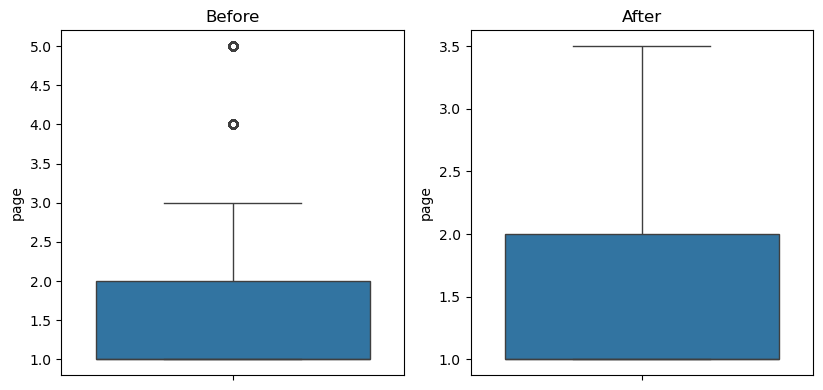

In [15]:
for col in numeric_features:
    plt.figure(figsize=(16,4))
        
    plt.subplot(143)
    sns.boxplot(data[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

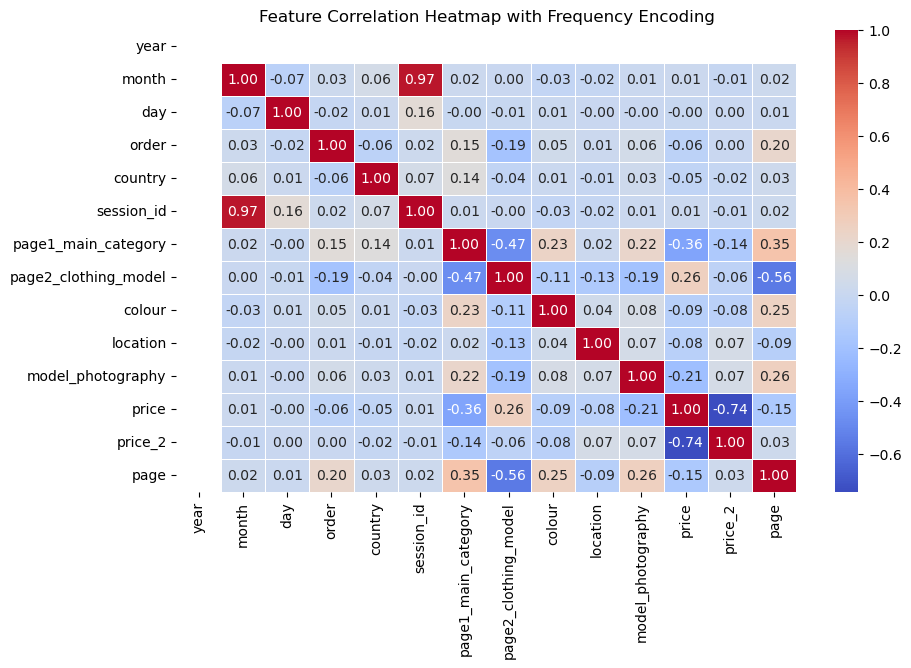

In [18]:
#  Frequency Encoding
freq_encoding = data['page2_clothing_model'].value_counts().to_dict()
click_encoded = data.copy()
click_encoded['page2_clothing_model'] = click_encoded['page2_clothing_model'].map(freq_encoding)

# Compute the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(click_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap with Frequency Encoding")
plt.show()

Text(0.5, 1.0, 'Price vs Order')

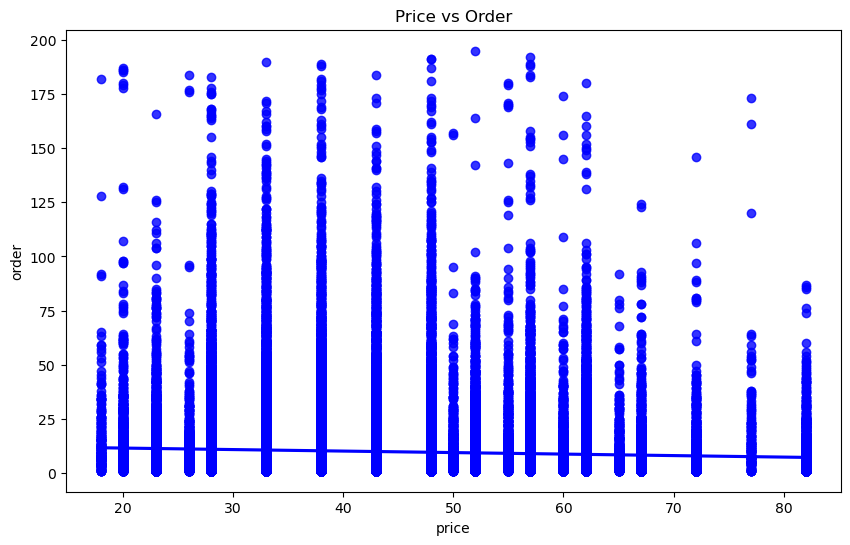

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x=data['price'], y=data['order'], color='blue')
plt.title("Price vs Order")